In [2]:
import yfinance as yf
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import probplot, norm, t
import statsmodels.api as sm

# Download and Save the data

In [3]:
symbol= 'SPY' # stock symbol
start_date = "2010-01-01"
end_date = "2022-12-31"
data_filename = f"data/{symbol}_{start_date}_{end_date}.csv"

if not os.path.exists(data_filename):
    data = yf.download(symbol, start=start_date, end=end_date)

    # if wanna model the more stationary 
    # percentage change of the Close price
    data['diffs']=np.around(data['Close'].pct_change()*100,8)
    data['diffs'].fillna(0,inplace=True)
    
    data['date']=data.index
    data['date'].dt.strftime('%Y-%m-%d')
    data=data.reset_index(drop=True)
    data.to_csv(data_filename, index=False)
else:
    data = pd.read_csv(data_filename, parse_dates=True)

# Data Exploration

In [5]:
data = pd.read_csv(data_filename, parse_dates=True)
data

,Open,High,Low,Close,Adj Close,Volume,diffs,date
0,112.370003,113.389999,111.510002,113.330002,87.129929,118944600,0.000000,2010-01-04
1,113.260002,113.680000,112.849998,113.629997,87.360596,111579900,0.264710,2010-01-05
2,113.519997,113.989998,113.430000,113.709999,87.422058,116074400,0.070406,2010-01-06
3,113.500000,114.330002,113.180000,114.190002,87.791122,131091100,0.422129,2010-01-07
4,113.889999,114.620003,113.660004,114.570000,88.083275,126402800,0.332776,2010-01-08
...,...,...,...,...,...,...,...,...
3267,379.649994,383.059998,378.029999,382.910004,377.177429,59857300,0.575227,2022-12-23
3268,382.790009,383.149994,379.649994,381.399994,375.690002,51638200,-0.394351,2022-12-27
3269,381.329987,383.390015,376.420013,376.660004,371.020996,70911500,-1.242787,2022-12-28
3270,379.630005,384.350006,379.079987,383.440002,377.699463,66970900,1.800032,2022-12-29



Any missing values? -> False


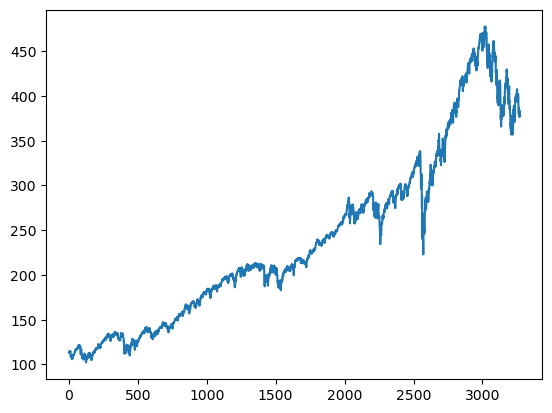

In [73]:
data['Close'].plot()
print('\nAny missing values? ->',data['Close'].isna().any())

<Axes: >

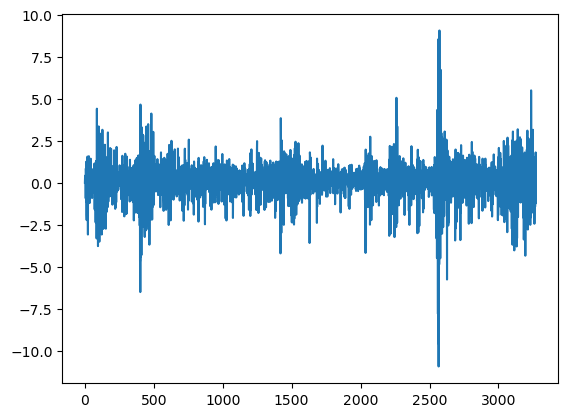

In [7]:
data['diffs'].plot()

mean =  0.043396621411980446 , std = 1.1130569599387339


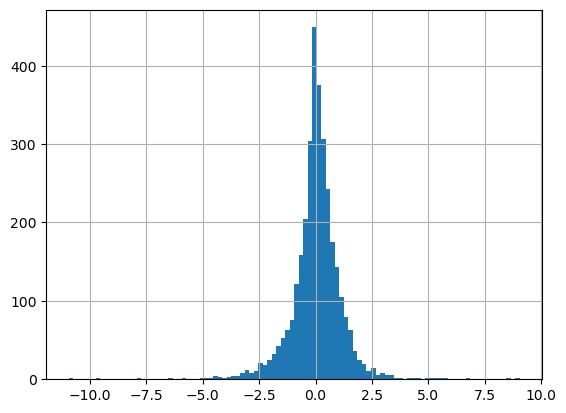

In [8]:
data['diffs'].hist(bins=100)
print('mean = ',data['diffs'].mean(),
      ', std =',data['diffs'].std())

skewness = -0.5109448526360364 , kurtosis = 10.67731207438218


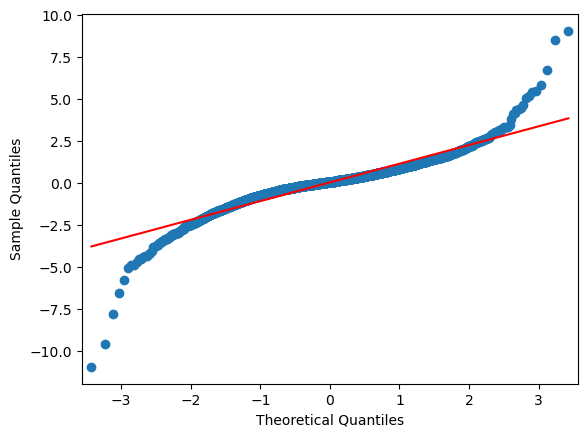

In [13]:
sm.qqplot(data['diffs'].dropna(), line='s');
print('skewness =',data['diffs'].skew(),
      ', kurtosis =',data['diffs'].kurtosis())

The daily % change is fairly normal distributed, but not too perfectly.

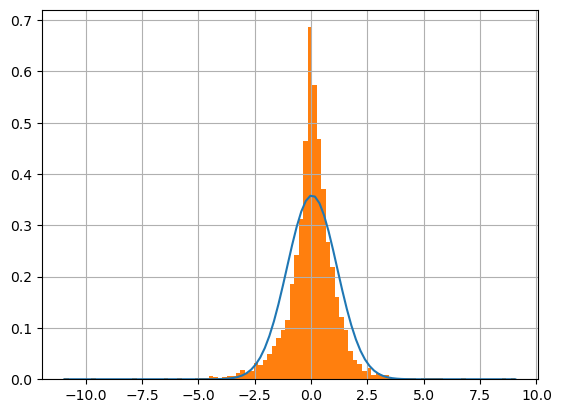

In [14]:
# compare with normal distribution
x_list=np.linspace(data['diffs'].min(),
                   data['diffs'].max(),
                   100)
y_list=norm.pdf(x_list,
                loc=data['diffs'].mean(),
                scale=data['diffs'].std())
plt.plot(x_list,y_list)
data['diffs'].hist(bins=100,density=True);

(nu, loc, scale) = (2.6045743667578547, 0.08242851942113273, 0.6394985362026306)


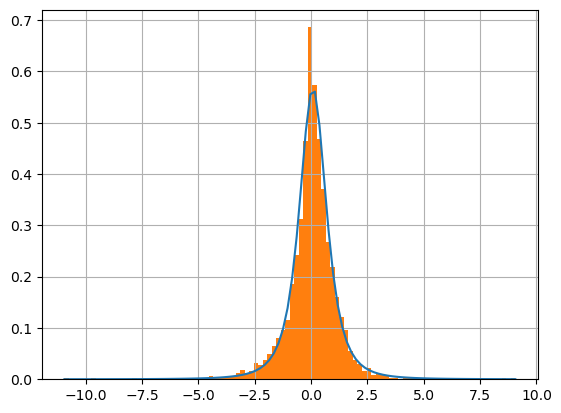

In [16]:
# compare with t distribution
x_list=np.linspace(data['diffs'].min(),
                   data['diffs'].max(),
                   100)

params=t.fit(data['diffs'].dropna()) # fit with t distribution
nu, loc, scale = params
y_list=t.pdf(x_list,nu,loc,scale)

plt.plot(x_list,y_list)
data['diffs'].hist(bins=100,density=True);

print('(nu, loc, scale) =',params)

t-distribution can do a better fitting 

### check the volatility clustering for the daily % change

<Axes: >

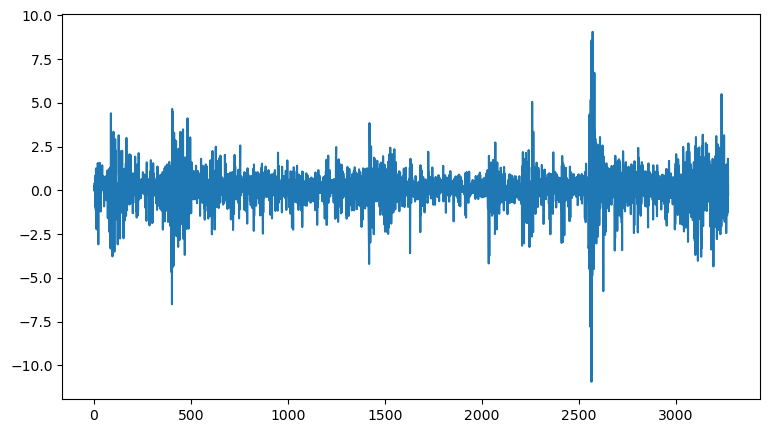

In [17]:
data['diffs'].plot(figsize=(9,5))